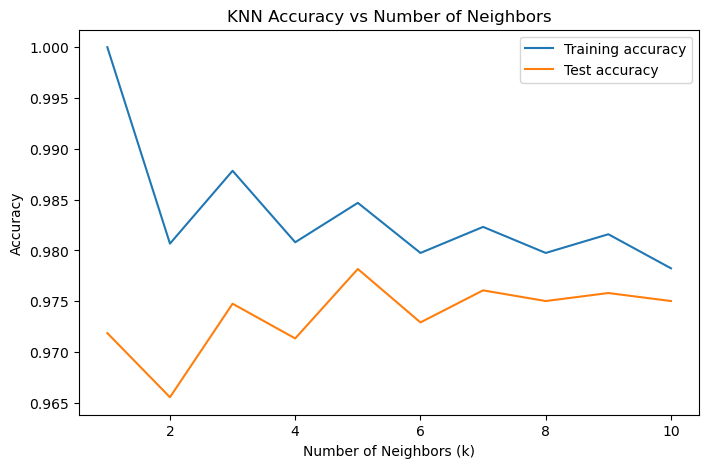

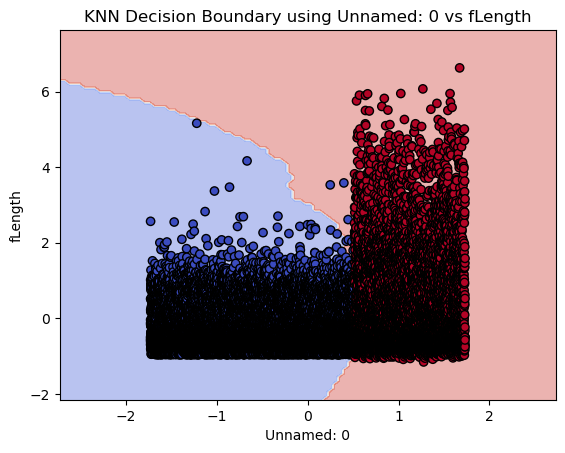

In [5]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Load your CSV file ---
data = pd.read_csv("telescope_data.csv")

# --- Split features and target ---
X = data.drop("class", axis=1)   # all features
y = data["class"]                # target column

# --- Encode target if it's categorical (e.g., 'g', 'h') ---
le = LabelEncoder()
y = le.fit_transform(y)

# --- Standardize the features (very important for KNN) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

# --- Check accuracy for different k values ---
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# --- Plot accuracy vs number of neighbors ---
plt.figure(figsize=(8,5))
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.legend()
plt.title("KNN Accuracy vs Number of Neighbors")
plt.show()

# --- Decision Boundary Visualization (only for 2 features) ---
# Select first two features for visualization
f1, f2 = X.columns[:2]

X_pair = X_scaled[:, :2]
X_train_pair, X_test_pair, y_train_pair, y_test_pair = train_test_split(
    X_pair, y, stratify=y, test_size=0.2, random_state=42
)

# Train KNN on 2 features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pair, y_train_pair)

# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    knn,
    X_pair,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.4
)

# Scatter points
plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
plt.xlabel(f1)
plt.ylabel(f2)
plt.title(f"KNN Decision Boundary using {f1} vs {f2}")
plt.show()
